# Regression:

Regression is a statistical model that tries to analyse the effect of one or more variables(independent variables) on another variable(dependent variable). 

In simple terms, regression model tries to analyse the correlation betwenn the independent and dependent variables and tries to predict the dependent variable for a given independent variable/s.

The Regression model is further subdivided into two methods:
1. Linear
2. Logistic

## Linear Regression:

As the name suggests, Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. For example, a modeler might want to relate the number of cylinders in a car to the mpg of that car.

The formula for a Linear regression is given as :  **Y = ax + b**

Here **Y** is the dependent or target variables
**a** is the slope of the regression line
**X** is the independent variable
**b** is the intercept of the regression line, i.e., value of **Y** when **X=0**

## Logistic Regression:

Logistic regression is used when the target or dependent variable is categorical
e.g., Heads or Tails, Win or Loose, Alive or Dead, Healthy or Sick etc.

**Hypothesis => Y = aX + b
hΘ(x) = sigmoid (Y)**

If ‘Y’ goes to infinity, Y(predicted) will become 1 and if ‘Y’ goes to negative infinity, Y(predicted) will become 0.

The basis for Linear and Logistic regression is the correlation between the dependent and independent variables.

## Covariance:
It is the directional relationship between the two variables. A positive covariance means that variables move together while a negative covariance means they move inversely.


Let us look at each of these concepts using python code below

In [1]:
# Lets import the required python packages. Not: We are not going to use the pandas correlation function or the sci-kit leran's regression packages as we are trying to build everything from scratch. However, we will use the pandas for loading the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #we use matplotlib for plotting the data
%matplotlib inline
plt.style.use('ggplot') # I personally prefer R's ggplot as it's more elegant. Hence, we build our plots using the ggplot style.

In [ ]:
# Loading the data. For demonstating the Linear Regression I am using the Auto MPG dataset, which is available on: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df.head()

In [ ]:
# Let us check the size of the dataframe, i.e., number of rows of data we have for analysis

df.shape[0]

In [ ]:
# Let us check if there are any missing values. However, before proceeding further, we found that the missing values are replaced by '?'. So, let us replace them back to null
df.replace('?',np.nan,inplace=True)
df.isna().sum()

In [ ]:
# Now we see there are 6 missing values in the horsepower column of 398 rows. Let us just drop NA
df.dropna(inplace=True)

In [ ]:
# Before moving further let us check the datatypes of each column
df.dtypes

In [ ]:
# Though horsepower is a flot, it is  encapsulated in a string. Let us convert it back to float
df['horsepower'] = df['horsepower'].astype(float)

In [ ]:
# Let us proceed further and find the correlation between each variable. This is a tedious work, still worth trying.
# The steps we need to follow are:
    #1. Find the mean of each column
    #2. Subtract every row in a column with the mean of the column
    #3. Multiple each of these subtracted values and find the sum(co-variance)
    #4. Square each of the mean subtracted value and find the sum(variance)
    #5. Now we can calculate our first constant i.e, slope of the regression line(a) = co-variance/variance
    #6. Now we calculate our other constant, i.e., intercept(b) = = mean(y) - a * mean(x)
#First let us calculate the mean
mean_mpg = df['mpg'].sum()/df.shape[0]
mean_cylinders = df['cylinders'].sum()/df.shape[0]
mean_displacement = df['displacement'].sum()/df.shape[0]
mean_horsepower = df['horsepower'].sum()/df.shape[0]
mean_weight = df['weight'].sum()/df.shape[0]
mean_acceleration = df['acceleration'].sum()/df.shape[0]

In [ ]:
#Differentiate mean with value
mean_diff_mpg = df['mpg'] - mean_mpg
mean_diff_cylinders = df['cylinders'] - mean_cylinders
mean_diff_displacement = df['displacement'] - mean_displacement
mean_diff_horsepower = df['horsepower'] - mean_horsepower
mean_diff_weight = df['weight'] - mean_weight
mean_diff_acceleration = df['acceleration'] - mean_acceleration

In [ ]:
#Squaring the above value
mean_diff_mpg_sqr = np.square(mean_diff_mpg)
mean_diff_cylinders_sqr = np.square(mean_diff_cylinders)
mean_diff_displacement_sqr = np.square(mean_diff_displacement)
mean_diff_horsepower_sqr = np.square(mean_diff_horsepower)
mean_diff_weight_sqr = np.square(mean_diff_weight)
mean_diff_acceleration_sqr = np.square(mean_diff_acceleration)

In [ ]:
#Calculate the variance
mpg_variance = mean_diff_mpg_sqr.sum()
cylinders_variance = mean_diff_cylinders_sqr.sum()
displacement_variance = mean_diff_displacement_sqr.sum()
horsepower_variance = mean_diff_horsepower_sqr.sum()
weight_variance = mean_diff_weight_sqr.sum()
acceleration_variance = mean_diff_acceleration_sqr.sum()

In [ ]:
#Multiply the mean difference of two values - 1st step in finding covariance
mpg_cylinders = mean_diff_mpg * mean_diff_cylinders
mpg_displacement = mean_diff_mpg * mean_diff_displacement
mpg_horsepower = mean_diff_mpg * mean_diff_horsepower
mpg_weight = mean_diff_mpg * mean_diff_weight
mpg_acceleration = mean_diff_mpg * mean_diff_acceleration
cylinders_displacement = mean_diff_cylinders * mean_diff_displacement
cylinders_horsepower = mean_diff_cylinders * mean_diff_horsepower
cylinders_weight = mean_diff_cylinders * mean_diff_weight
cylinders_acceleration = mean_diff_cylinders * mean_diff_acceleration
displacement_horsepower = mean_diff_displacement * mean_diff_horsepower
displacement_weight = mean_diff_displacement * mean_diff_weight
displacement_acceleration = mean_diff_displacement * mean_diff_acceleration
horsepower_weight = mean_diff_horsepower * mean_diff_weight
horsepower_acceleration = mean_diff_horsepower * mean_diff_acceleration
weight_acceleration = mean_diff_weight * mean_diff_acceleration

In [ ]:
#Calculate co-variance
mpg_cylinders_covar = mpg_cylinders.sum()
mpg_displacement_covar = mpg_displacement.sum()
mpg_horsepower_covar = mpg_horsepower.sum()
mpg_weight_covar = mpg_weight.sum()
mpg_acceleration_covar = mpg_acceleration.sum()
cylinders_displacement_covar = cylinders_displacement.sum()
cylinders_horsepower_covar = cylinders_horsepower.sum()
cylinders_weight_covar = cylinders_weight.sum()
cylinders_acceleration_covar = cylinders_acceleration.sum()
displacement_horsepower_covar = displacement_horsepower.sum()
displacement_weight_covar = displacement_weight.sum()
displacement_acceleration_covar = displacement_acceleration.sum()
horsepower_weight_covar = horsepower_weight.sum()
horsepower_acceleration_covar = horsepower_acceleration.sum()
weight_acceleration_covar = weight_acceleration.sum()

In [ ]:
#Finding the slope(a) value
mpg_cylinders_a = mpg_cylinders_covar/mpg_variance
mpg_displacement_a = mpg_displacement_covar/mpg_variance
mpg_horsepower_a = mpg_horsepower_covar/mpg_variance
mpg_weight_a = mpg_weight_covar/mpg_variance
mpg_acceleration_a = mpg_acceleration_covar/mpg_variance

In [ ]:
mpg_cylinder_b = (mean_cylinders) - mpg_cylinders_a*(mean_mpg)

In [ ]:
df_selected = df[['mpg','cylinders']]

In [ ]:
df_selected.shape[0]

In [ ]:
test = df_selected[319:]

In [ ]:
test.reset_index(inplace=True)

In [ ]:
predictions = list()
for row in test['mpg']:
    yhat = mpg_cylinder_b + mpg_cylinders_a * row
    predictions.append(yhat)

In [ ]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

In [ ]:
rmse_metric(predictions,test['cylinders'])

In [ ]:
plt.scatter(np.arange(test.shape[0]),test['cylinders'])
m, b = np.polyfit(test['mpg'], test['cylinders'], 1)
plt.plot(test['mpg'],m*test['mpg'] + b)
plt.scatter(np.arange(test.shape[0]),predictions)

In [ ]:
# The model isn't good as we have tried to fit it with a single independent variable. We may need to try fitting it with multiple independent variables, that means we need to fit a multilinear regression model. So, let us continue with it.
cylinders_displacement_a = cylinders_displacement_covar/displacement_variance
cylinders_horsepower_a = cylinders_horsepower_covar/horsepower_variance
cylinders_weight_a = cylinders_weight_covar/weight_variance
cylinders_acceleration_a = cylinders_acceleration_covar/acceleration_variance

In [ ]:
cylinder_displacement_b = (mean_cylinders) - cylinders_displacement_a*(mean_displacement)
cylinder_horsepower_b = (mean_cylinders) - cylinders_horsepower_a*(mean_horsepower)
cylinder_weight_b = (mean_cylinders) - cylinders_weight_a*(mean_weight)
cylinder_acceleration_b = (mean_cylinders) - cylinders_acceleration_a*(mean_acceleration)

In [ ]:
test = df[319:]

In [ ]:
test.reset_index(inplace=True)

In [ ]:
predictions = list()
for row1,row2,row3,row4,row5 in zip(test['mpg'],test['displacement'],test['horsepower'],test['weight'],test['acceleration']):
    yhat = (mpg_cylinder_b + mpg_cylinders_a * row1) + (cylinder_displacement_b + cylinders_displacement_a * row2) + (cylinder_horsepower_b + cylinders_horsepower_a * row3) + (cylinder_weight_b + cylinders_weight_a * row4) + (cylinder_acceleration_b + cylinders_acceleration_a*row5)
    predictions.append(yhat)

In [ ]:
rmse_metric(predictions,test['cylinders'])

In [ ]:
plt.scatter(np.arange(test.shape[0]),test['cylinders'])
# m, b = np.polyfit(test['mpg'],test['displacement'],test['horsepower'],test['weight'],test['acceleration'], test['cylinders'], 1)
# plt.plot(test['mpg'],m*test['mpg'] + b)
plt.scatter(np.arange(test.shape[0]),predictions)

# Now let us try to improvise the model performance using stochastic gradiant descent and this time, let us try to predict the value for mpg

In [ ]:
y = df['mpg']
X = df.drop('mpg',axis=1)

In [ ]:
X.drop(['origin','car_name'],axis=1,inplace=True)

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [ ]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        print("At iteration",iteration,"cost:",cost)
        cost_history[iteration] = cost
    return B, cost_history

In [ ]:
X_train = X[:314]
y_train = y[:314]
X_test = X[314:]
y_test = y[314:]

In [ ]:
X_train = np.c_[np.ones(len(X_train),dtype='float'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='float'),X_test]

In [ ]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
learning_rate = 0.0001
epochs = 800000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, learning_rate, epochs)

In [ ]:
plt.plot(cost_history)

In [ ]:
def pred(X,coef):
    return np.sum(X*coef,axis=1)

In [ ]:
y_predict = pred(X_test,newB)

In [ ]:
def r2(pred,y):
    sstot = np.sum((y-y.mean())**2)
    ssres = np.sum((pred - y)**2)
    r2 = 1-(ssres/sstot)
    return(r2)

r2(y_predict,y_test)

# Let us now work on Logistic Regression

#### For Logistic regression, we will work on Titanic dataset, the most famous dataset on Kaggle for classifying whther the passenger survived the tragedy or died.

In [2]:
titanic_train = pd.read_csv('/home/faceopen/Downloads/titanic/train.csv')
titanic_test = pd.read_csv('/home/faceopen/Downloads/titanic/test.csv')

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())

In [8]:
import seaborn as sns

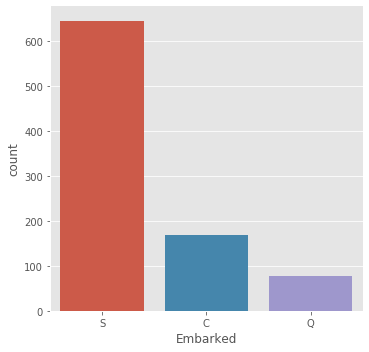

In [9]:
sns.catplot(x = 'Embarked', kind = 'count', data = titanic_train)

In [10]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna("S")

In [11]:
titanic_train['Cabin'] = titanic_train['Cabin'].fillna("Missing")
titanic_test['Cabin'] = titanic_test['Cabin'].fillna("Missing")

In [12]:
titanic_test['Fare'] = titanic_test['Fare'].median()

In [13]:
## get dummy variables for Column sex and embarked since they are categorical value.
titanic_train = pd.get_dummies(titanic_train, columns=["Sex"], drop_first=True)
titanic_train = pd.get_dummies(titanic_train, columns=["Embarked"],drop_first=True)


#Mapping the data.
titanic_train['Fare'] = titanic_train['Fare'].astype(int)
titanic_train.loc[titanic_train.Fare<=7.91,'Fare']=0
titanic_train.loc[(titanic_train.Fare>7.91) &(titanic_train.Fare<=14.454),'Fare']=1
titanic_train.loc[(titanic_train.Fare>14.454)&(titanic_train.Fare<=31),'Fare']=2
titanic_train.loc[(titanic_train.Fare>31),'Fare']=3

titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_train.loc[ titanic_train['Age'] <= 16, 'Age']= 0
titanic_train.loc[(titanic_train['Age'] > 16) & (titanic_train['Age'] <= 32), 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > 32) & (titanic_train['Age'] <= 48), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > 48) & (titanic_train['Age'] <= 64), 'Age'] = 3
titanic_train.loc[titanic_train['Age'] > 64, 'Age'] = 4

In [14]:
## get dummy variables for Column sex and embarked since they are categorical value.
titanic_test = pd.get_dummies(titanic_test, columns=["Sex"], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=["Embarked"],drop_first=True)


#Mapping the data.
titanic_test['Fare'] = titanic_test['Fare'].astype(int)
titanic_test.loc[titanic_test.Fare<=7.91,'Fare']=0
titanic_test.loc[(titanic_test.Fare>7.91) &(titanic_test.Fare<=14.454),'Fare']=1
titanic_test.loc[(titanic_test.Fare>14.454)&(titanic_test.Fare<=31),'Fare']=2
titanic_test.loc[(titanic_test.Fare>31),'Fare']=3

titanic_test['Age']=titanic_test['Age'].astype(int)
titanic_test.loc[ titanic_test['Age'] <= 16, 'Age']= 0
titanic_test.loc[(titanic_test['Age'] > 16) & (titanic_test['Age'] <= 32), 'Age'] = 1
titanic_test.loc[(titanic_test['Age'] > 32) & (titanic_test['Age'] <= 48), 'Age'] = 2
titanic_test.loc[(titanic_test['Age'] > 48) & (titanic_test['Age'] <= 64), 'Age'] = 3
titanic_test.loc[titanic_test['Age'] > 64, 'Age'] = 4

In [15]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
titanic_train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
titanic_test.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = titanic_train.drop(['Survived'], axis=1)
y = titanic_train["Survived"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state = 5)

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [21]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [22]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

Optimal Parameters are: 
 [[ 4.75261604e+00]
 [ 4.95587426e-03]
 [-9.80941918e-01]
 [-6.53114118e-01]
 [-7.93330966e-01]
 [-2.40297811e-01]
 [ 9.02068335e-01]
 [-5.15366136e+00]
 [ 2.40354583e-01]
 [-4.17214295e-01]] 



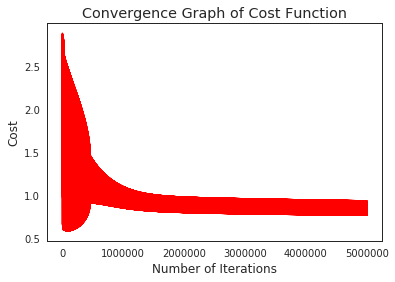

In [35]:
# m = len(y_train)

# X_train = np.hstack((np.ones((m,1)),X_train))
# n = np.size(X_train,1)
# params = np.zeros((n,1))

iterations = 5000000
learning_rate = 0.0001

# initial_cost = compute_cost(X_train, y_train, params)

# print("Initial Cost is: {} \n".format(initial_cost))

# y_train = y_train[:,np.newaxis]

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [24]:
m = len(y_test)
X_test = np.hstack((np.ones((m,1)),X_test))

In [25]:
y_test = y_test[:,np.newaxis]

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[83, 40],
       [10, 64]])

In [39]:
accuracy = (64+83)/(83+40+10+64)*100

In [40]:
accuracy

74.61928934010153

In [46]:
presision = 83/(40+64)*100

In [47]:
presision

79.8076923076923

In [43]:
recall = 64/(64+10)*100

In [44]:
recall

86.48648648648648

In [48]:
f1 = (2 * recall * precision) / (recall + presision)

In [49]:
f1

83.01297077668386